In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Adapted from https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [86]:
df = pd.DataFrame.from_csv('worldbankNDVIRegression.csv')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, Malawi to nan
Data columns (total 4 columns):
Time                                                                        27 non-null float64
Agriculture, value added per worker (constant 2010 US$) [NV.AGR.EMPL.KD]    26 non-null float64
GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG]                        27 non-null float64
NDVI                                                                        27 non-null float64
dtypes: float64(4)
memory usage: 1.1+ KB


In [88]:
df = df.dropna()

In [89]:
df.columns = ['year', 'gdp', 'productivity', 'ndvi']


In [90]:

# I had to switch to Numeric from float

df.year = pd.to_numeric(df.year, errors='raise', downcast='integer')

df.year = pd.to_datetime(df.year, format="%Y")


In [91]:
dfNew = df.drop(['year'], axis=1)

# Create x, where x the 'scores' column's values as floats
x = dfNew.values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

In [92]:
df_normalized

,0,1,2
0,0.309428,0.655176,0.587539
1,0.000000,0.093773,0.376908
2,0.462841,0.769061,0.905503
3,0.075468,0.000000,0.000000
4,0.445918,1.000000,0.539522
5,0.757673,0.607227,0.797451
6,0.718180,0.449155,0.632346
7,0.837917,0.437210,0.800465
8,0.959870,0.403098,0.940803
9,1.000000,0.354668,0.825535


In [93]:
df_normalized.year = df.year
df_normalized.year

Country Name
Malawi   1991-01-01
Malawi   1992-01-01
Malawi   1993-01-01
Malawi   1994-01-01
Malawi   1995-01-01
Malawi   1996-01-01
Malawi   1997-01-01
Malawi   1998-01-01
Malawi   1999-01-01
Malawi   2000-01-01
Malawi   2001-01-01
Malawi   2002-01-01
Malawi   2003-01-01
Malawi   2004-01-01
Malawi   2005-01-01
Malawi   2006-01-01
Malawi   2007-01-01
Malawi   2008-01-01
Malawi   2009-01-01
Malawi   2010-01-01
Malawi   2011-01-01
Malawi   2012-01-01
Malawi   2013-01-01
Malawi   2014-01-01
Malawi   2015-01-01
Malawi   2016-01-01
Name: year, dtype: datetime64[ns]

In [94]:
df_normalized.set_index(df_normalized.year, inplace=True)
df_normalized.columns = ['Agri_value_added', 'gdp', 'ndvi']



In [95]:
df_normalized.head()

,Agri_value_added,gdp,ndvi
year,,,
1991-01-01,0.309428,0.655176,0.587539
1992-01-01,0.000000,0.093773,0.376908
1993-01-01,0.462841,0.769061,0.905503
1994-01-01,0.075468,0.000000,0.000000
1995-01-01,0.445918,1.000000,0.539522


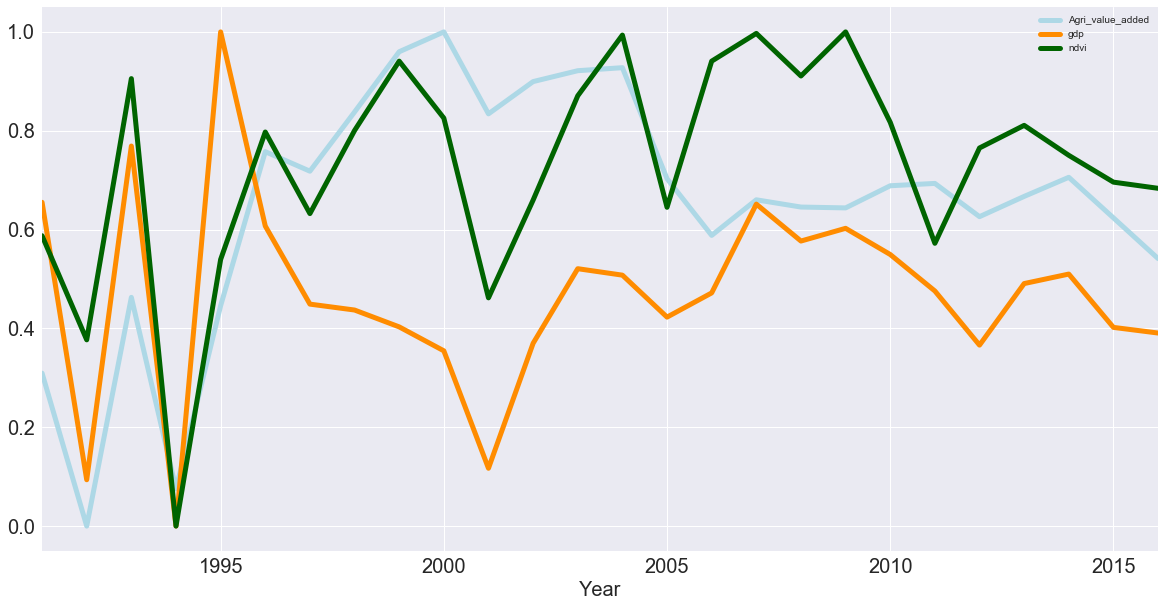

In [96]:
color = ['LightBlue', 'DarkOrange', 'DarkGreen']


df_normalized.plot(figsize=(20,10), linewidth=5, fontsize=20, color = color)
plt.xlabel('Year', fontsize=20);

In [81]:
df_normalized.corr()


,Agri_value_added,gdp,ndvi
Agri_value_added,1.000000,0.148469,0.619652
gdp,0.148469,1.000000,0.545208
ndvi,0.619652,0.545208,1.000000


In [82]:
# from numpy import concatenate
# from matplotlib import pyplot
# from pandas import read_csv
# from pandas import DataFrame
# from pandas import concat
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
import statsmodels.api as sm


In [83]:
df = df_normalized
df['const']=1
# print (df['gdp'])
model1=sm.OLS(endog=df['gdp'],exog=df['ndvi'])
results1=model1.fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:                    gdp   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     199.0
Date:                Tue, 29 May 2018   Prob (F-statistic):           2.08e-13
Time:                        19:37:02   Log-Likelihood:                 9.1274
No. Observations:                  26   AIC:                            -16.25
Df Residuals:                      25   BIC:                            -15.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ndvi           0.6303      0.045     14.106      0.0

In [84]:
df = df_normalized
df['const']=1
# print (df['gdp'])
model1=sm.OLS(endog=df['Agri_value_added'],exog=df['ndvi'])
results1=model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:       Agri_value_added   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     297.1
Date:                Tue, 29 May 2018   Prob (F-statistic):           2.18e-15
Time:                        19:37:03   Log-Likelihood:                 5.8349
No. Observations:                  26   AIC:                            -9.670
Df Residuals:                      25   BIC:                            -8.412
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ndvi           0.8742      0.051     17.238      0.0